In [1]:
from pathlib import Path
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from random import choice
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
base_dir=Path().cwd().resolve().parent
fruits_dir=base_dir/'datasets/storage/fruits-360_dataset/fruits-360'
test_dir=fruits_dir/'test-multiple_fruits'
my_test_dir=fruits_dir/'my_test'
gen=ImageDataGenerator().flow_from_directory(str(fruits_dir/'Test'))
labels=gen.class_indices
labels=[(v,k) for k,v in labels.items()]
labels.sort()
labels=[k for v,k in labels]

Found 20622 images belonging to 120 classes.


In [3]:
model_path=base_dir/'weights/alex_small_fruits.h5'
model=load_model(model_path)

In [46]:
images=list(my_test_dir.glob('*.jpg'))

apple2
Strawberry
probability: 62.75%


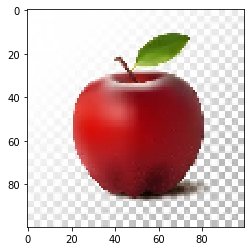

In [48]:
img_path=choice(images)
print(img_path.stem)
img=Image.open(str(img_path)).resize((100, 100))
plt.imshow(img)
img=np.array(img, dtype='float32')
img/=255.0
img=np.expand_dims(img,axis=0)
prob_vec = model.predict(img)
result=np.argmax(prob_vec, axis=1)[0]
prob = np.max(prob_vec, axis=1)[0]
print(labels[result])
print('probability: {:.2%}'.format(prob))